Using k-means to perform image compression. <br>
Test Image: beach.bmp <br>

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### read an image from a bmp file

(-0.5, 319.5, 213.5, -0.5)

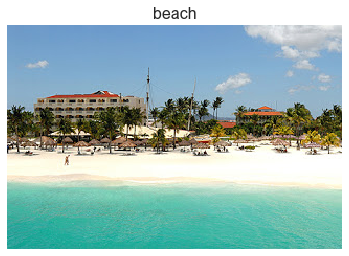

In [2]:
from skimage import io, img_as_float
#import the image
I = io.imread('beach.bmp')
I = img_as_float(I)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(I)
ax.set_title('beach', fontsize=16)
ax.axis('off')

The image I is a 3D numpy array <br>
I[i,j,k]: i is row index, j is column index, and k is channel (color) index <br>
I[0,0] is the pixel at row-0 and col-0, and it has three values r,g,b

In [3]:
I.shape

(214, 320, 3)

In [4]:
I[0,0]

array([0.43137255, 0.60392157, 0.78823529])

### Preparing the data matrix X

In [5]:
X=I.reshape(214*320,3)
X.shape

(68480, 3)

### Performing k-means on data matrix X

In [6]:
from sklearn.cluster import KMeans
n_clusters=5
model=KMeans(n_clusters=n_clusters)
model.fit(X)
labels=model.predict(X)
centers=model.cluster_centers_

In [7]:
# centers stores the cluster centers
centers[labels].shape

(68480, 3)

### Compressing the image using the cluster centers

In [8]:
Ic=centers[labels].reshape(214, 320, 3)

In [9]:
Ic.shape

(214, 320, 3)

### Visualizing the compressed image `Ic`

(-0.5, 319.5, 213.5, -0.5)

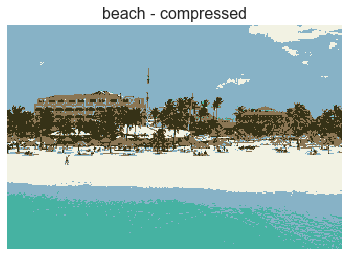

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(Ic)
ax.set_title('beach - compressed', fontsize=16)
ax.axis('off')

### Saving the compressed image to a bmp file

In [11]:
# normalizing the pixel values in the range of 0 ~ 255
Is=255*(Ic- Ic.min())/(Ic.max()-Ic.min())
# changing data type to unit8
Is=Is.astype('uint8')
io.imsave('beach_compressed_k' + str(n_clusters) + '.bmp', Is)